In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
import warnings
import statistics as stat
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
#Reading the Data
data = pd.read_csv('finalTrain.csv')
data.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21


In [3]:
#checking all the columns
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [4]:
# Checking the shape ie no of rows and columns of data
data.shape

(45584, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
#Checking if the data has any duplicates
data.duplicated().sum()

0

In [7]:
#Checking if the data has Null Columns 
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
#we have NUll values in the dataset , and need to be filled

In [9]:
numerical_features_with_nan = [feature for feature in data.columns if data[feature].dtypes!='O' and
                       data[feature].isnull().sum()>=1]

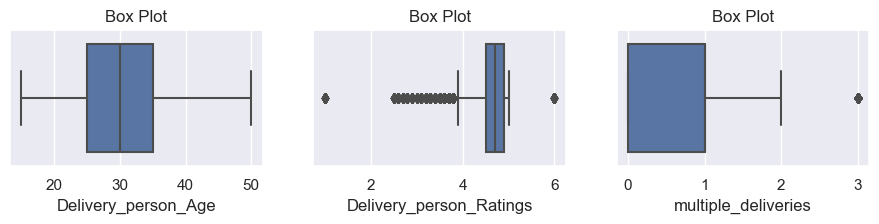

In [10]:
for i in range(0,len(numerical_features_with_nan)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=data[numerical_features_with_nan[i]])
    plt.title("Box Plot")

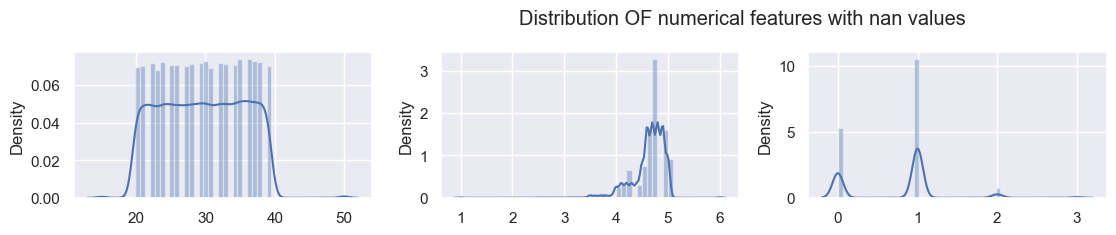

In [11]:
try:
    plt.suptitle("Distribution OF numerical features with nan values")
    for i in range(0,len(numerical_features_with_nan)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features_with_nan[i]])
        plt.tight_layout()
except Exception as e:
     print(e)


From the above observation , from box plot its clear that the data has outlieres and from the distribution of numerical features we found that the data is skewed so the mean is not prefered so we wil replace the Null/nan values with Median

In [12]:
##handling the missing values with the median
data["Delivery_person_Age"]=data["Delivery_person_Age"].fillna(np.nanmedian(data['Delivery_person_Age']))
data["Delivery_person_Ratings"] = data["Delivery_person_Ratings"].fillna(np.nanmedian(data['Delivery_person_Ratings']))
data["multiple_deliveries"] = data["multiple_deliveries"].fillna(np.nanmedian(data["multiple_deliveries"]))

In [13]:
#Handling missing values of categorical features
#we don't have have mode in numpy so we used statistics library
data["Weather_conditions"] = data["Weather_conditions"].fillna(stat.mode(data["Weather_conditions"]))
data["Road_traffic_density"] = data["Road_traffic_density"].fillna(stat.mode(data["Road_traffic_density"]))
data["Festival"] = data["Festival"].fillna(stat.mode(data["Festival"]))
data["City"]  = data["City"].fillna(stat.mode(data["City"]))

 Dataset has Time ordered and Time Picked Columns , we need to find the difference between both the values so
that we can get the difference that is time between ordere placed and order picked

In [15]:
df = data['Time_Orderd'].fillna('0')
ddf = df.values
lis = []
for i in range(0,len(ddf)):
    ddf_str  =  str(ddf[i])
    split_ddf = ddf_str.split(':')
    if len(split_ddf)==2:
        new = split_ddf[0]+'.'+split_ddf[1]
    else:
        new = split_ddf[0]
    lis.append(new)
new_data = pd.DataFrame(lis)
new_dataframe = new_data.astype(float)
new_dataframe.head(3)


,0
0,21.55
1,14.55
2,17.30


In [16]:
df2 = data['Time_Order_picked'].fillna('0')
ddf2 = df2.values
lis2 = []
for i in range(0,len(ddf2)):
    ddf_str2  =  str(ddf2[i])
    split_ddf2 = ddf_str2.split(':')
    if len(split_ddf2)==2:
        new2 = split_ddf2[0]+'.'+split_ddf2[1]
    else:
        new2 = split_ddf2[0]
    lis2.append(new2)
new_data2 = pd.DataFrame(lis2)
new_dataframe2 = new_data2.astype(float)
new_dataframe2.head(3)

,0
0,22.10
1,15.05
2,17.40


In [17]:
Time_difference = new_dataframe2-new_dataframe
t = pd.DataFrame(Time_difference)

In [18]:
data['Time_Differnece'] = t

In [19]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Differnece
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0.55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0.50
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0.10
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0.10
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0.55


In [20]:
# Dropping the columns which are not needed 
data.drop(columns=['Time_Orderd','Time_Order_picked','ID','Delivery_person_ID'],axis=1,inplace=True)

In [21]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Differnece
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0.55
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0.50
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0.10
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0.10
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0.55


In [23]:
#The ordered data is in object type we need to convert it into datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [24]:
# WE can extract some important information from the dataset , like the day name eg monday,tuesday etc
data['date_day_name'] = data['Order_Date'].dt.day_name()

In [25]:
data['date_day_name']

0           Friday
1           Sunday
2           Sunday
3           Sunday
4           Monday
           ...    
45579     Thursday
45580    Wednesday
45581     Thursday
45582       Sunday
45583     Thursday
Name: date_day_name, Length: 45584, dtype: object

In [26]:
#we dont need order date so now we can drop this column
data.drop(columns=['Order_Date'],axis=1,inplace=True)

Dataset has Restaurant latitude,longitude and delivery latitude ,longitude , we can convert these latitude longitude into locations 
Restaurant and Delivery location and by subtracting them we can get the distance of between these two locations

In [27]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(lat1,lon1,lat2,lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6371 * c
    return km

dis = data.apply(lambda row: haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']), axis=1)

In [28]:
# Convert the distance into Dataframe
dis_new = pd.DataFrame(dis)

In [29]:
# Adding the dataframe into the dataset
data['Distance_between_ord_pick'] =dis_new

In [30]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Differnece,date_day_name,Distance_between_ord_pick
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0.55,Friday,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0.50,Sunday,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0.10,Sunday,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0.10,Sunday,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0.55,Monday,19.396618


In [31]:
#Now we dont need these columns so drop them
data.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [32]:
# seperating categorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,date_day_name
count,45584,45584,45584,45584,45584,45584,45584
unique,6,4,4,4,2,3,7
top,Fog,Low,Snack,motorcycle,No,Metropolitian,Thursday
freq,8269,16077,11530,26429,44688,35287,7512


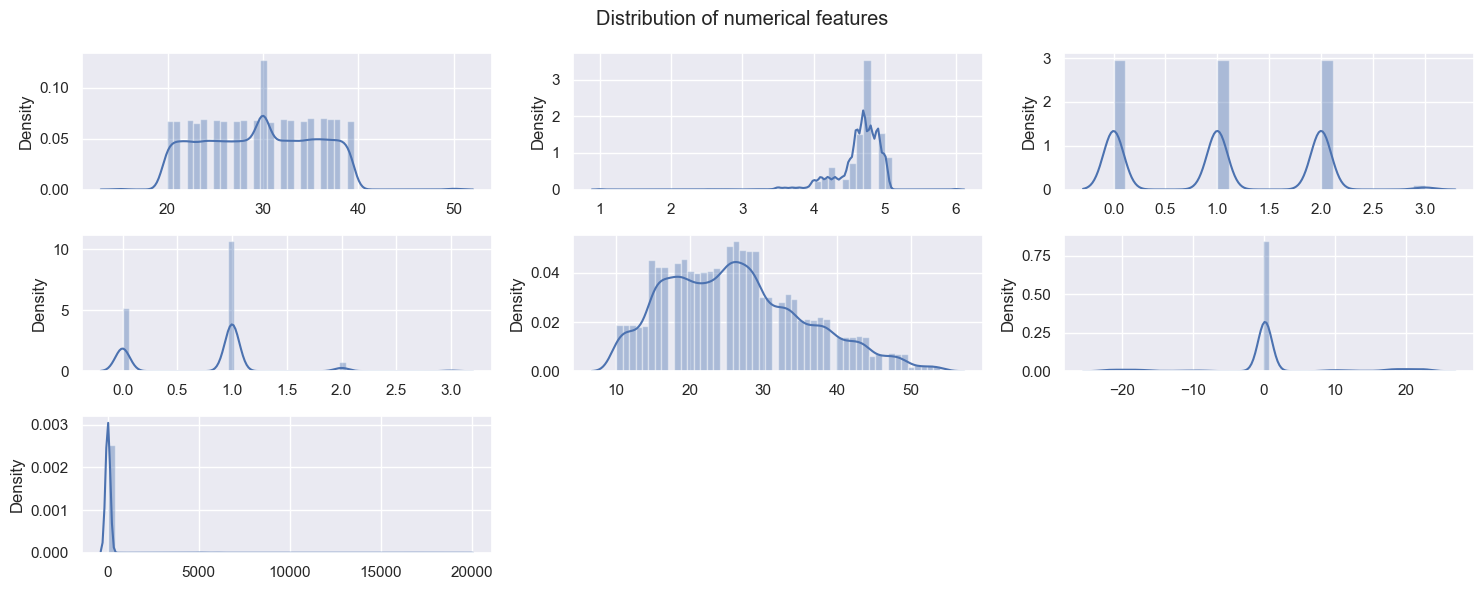

In [41]:
try:
    plt.suptitle("Distribution of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
     print(e)

In [37]:
data[numerical_features].corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Differnece,Distance_between_ord_pick
Delivery_person_Age,1.000000,-0.067272,0.004649,0.111325,0.292909,0.008902,0.023552
Delivery_person_Ratings,-0.067272,1.000000,0.037397,-0.112626,-0.330751,0.006172,0.010044
Vehicle_condition,0.004649,0.037397,1.000000,-0.095547,-0.234456,0.054691,0.092373
multiple_deliveries,0.111325,-0.112626,-0.095547,1.000000,0.378268,0.003273,0.000844
Time_taken (min),0.292909,-0.330751,-0.234456,0.378268,1.000000,-0.000463,-0.002503
Time_Differnece,0.008902,0.006172,0.054691,0.003273,-0.000463,1.000000,0.126701
Distance_between_ord_pick,0.023552,0.010044,0.092373,0.000844,-0.002503,0.126701,1.000000


In [ ]:
The numerical has very less or no Corelation betwwen them

In [35]:
data[catigorical_features].describe()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,date_day_name
count,45584,45584,45584,45584,45584,45584,45584
unique,6,4,4,4,2,3,7
top,Fog,Low,Snack,motorcycle,No,Metropolitian,Thursday
freq,8269,16077,11530,26429,44688,35287,7512


In [ ]:
Form the above table we can see the number of unique values in each column, freq that is the highest no of value ie top value
eg In festival No has highest frequency

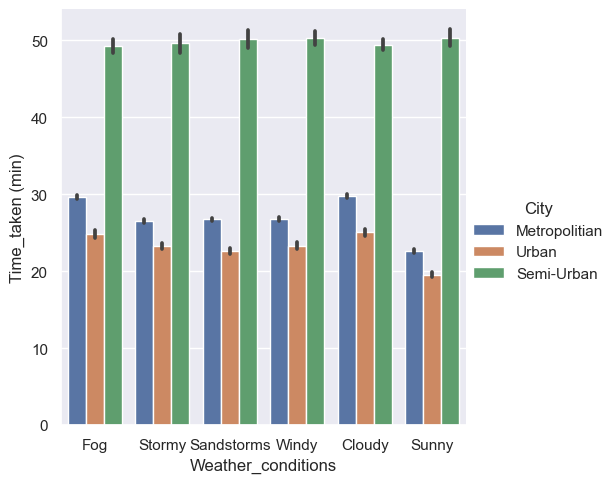

In [56]:
sns.catplot(data=data, x="Weather_conditions", y="Time_taken (min)",hue="City", kind="bar")

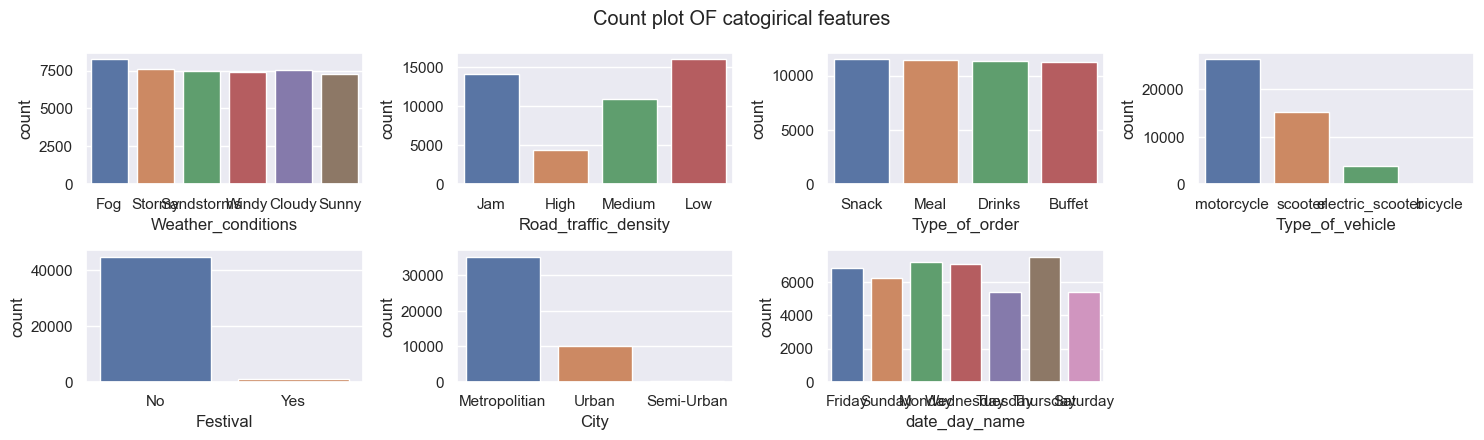

In [38]:
try:
    plt.suptitle("Count plot OF catogirical features")
    for i in range(0,len( catigorical_features)):
        plt.subplot(3,4,i+1)
        sns.countplot(x=data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
     print(e)

<AxesSubplot:xlabel='Weather_conditions', ylabel='Time_taken (min)'>

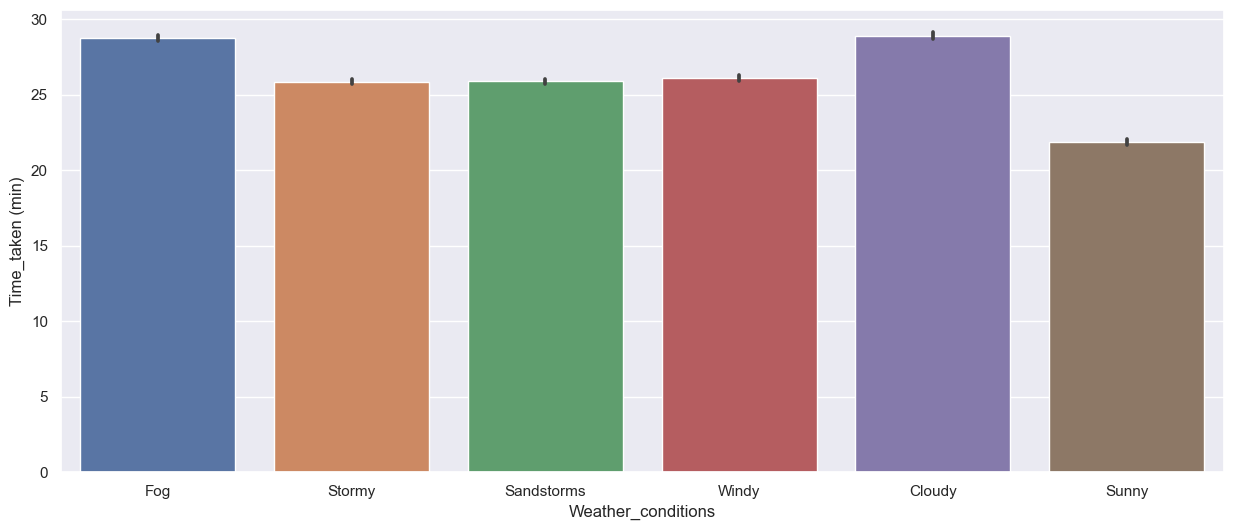

In [42]:
sns.barplot(x="Weather_conditions",y="Time_taken (min)",data=data)

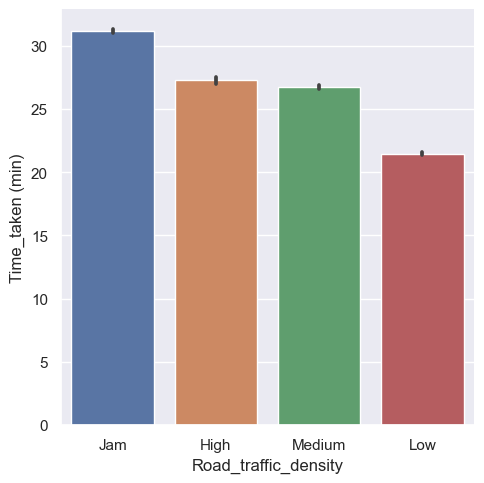

In [44]:
sns.catplot(data=data, x="Road_traffic_density", y="Time_taken (min)", kind="bar")

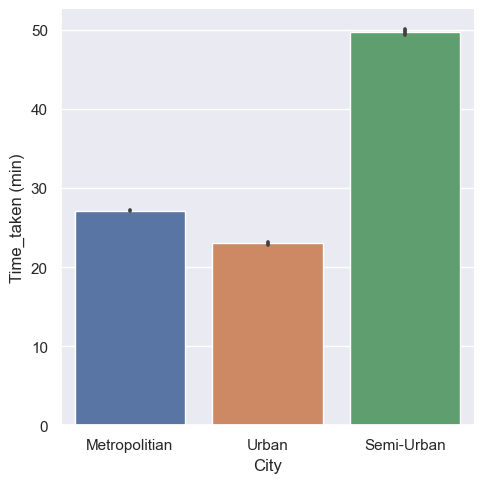

In [52]:
sns.catplot(data=data, x="City", y="Time_taken (min)", kind="bar")

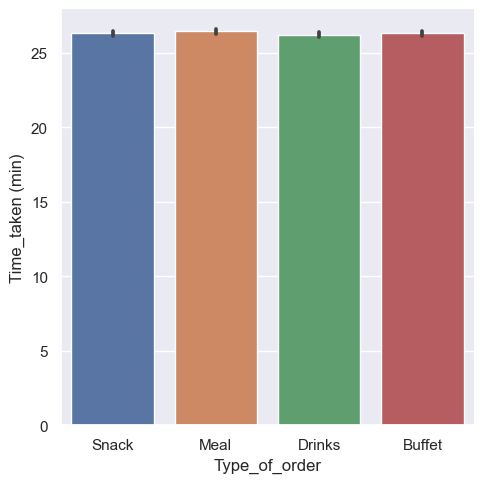

In [55]:
sns.catplot(data=data, x="Type_of_order", y="Time_taken (min)", kind="bar")

In [ ]:
#The type of order has no relation with the time ordered all type of orders gets
#delivered at the same time

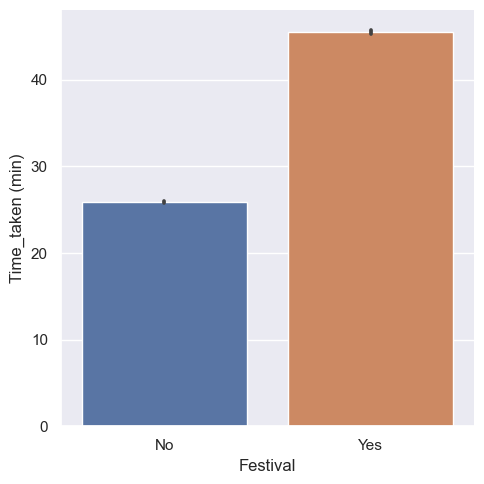

In [56]:
sns.catplot(data=data, x="Festival", y="Time_taken (min)", kind="bar")

In [ ]:
# When there is feestival the delivery time is more

<AxesSubplot:>

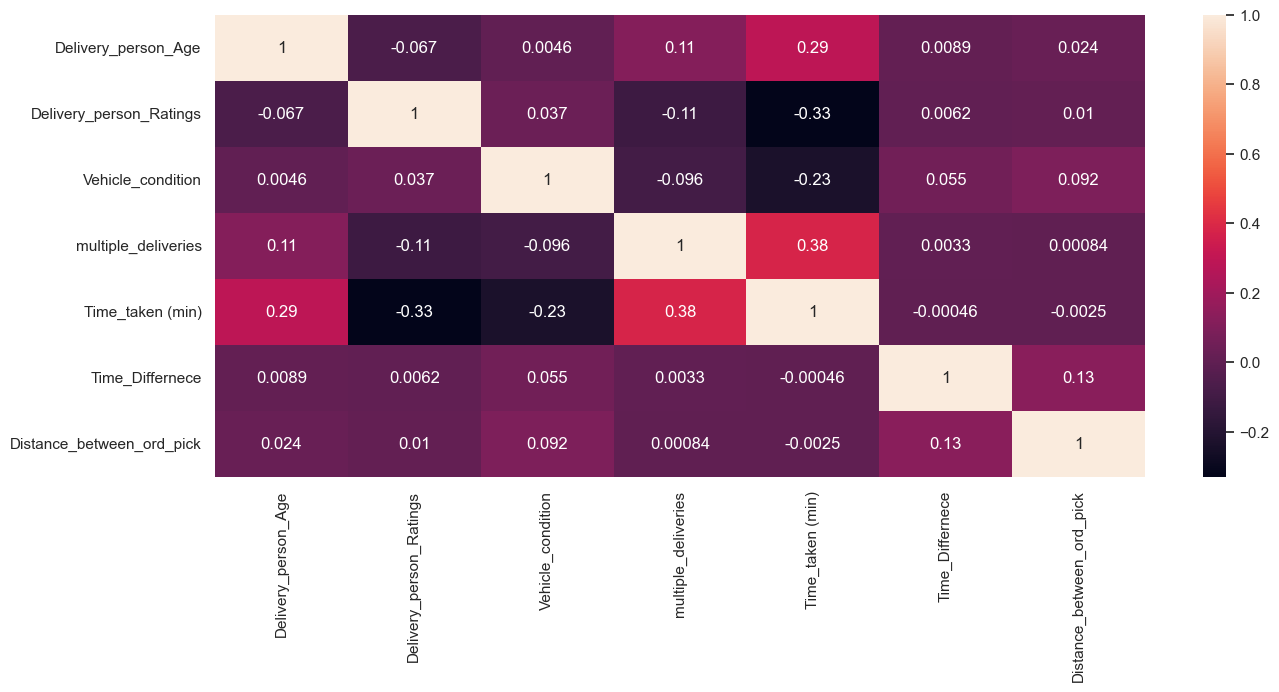

In [57]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# There is very low multicolinearity in the features

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Delivery_person_Age        45584 non-null  float64
 1   Delivery_person_Ratings    45584 non-null  float64
 2   Weather_conditions         45584 non-null  object 
 3   Road_traffic_density       45584 non-null  object 
 4   Vehicle_condition          45584 non-null  int64  
 5   Type_of_order              45584 non-null  object 
 6   Type_of_vehicle            45584 non-null  object 
 7   multiple_deliveries        45584 non-null  float64
 8   Festival                   45584 non-null  object 
 9   City                       45584 non-null  object 
 10  Time_taken (min)           45584 non-null  int64  
 11  Time_Differnece            45584 non-null  float64
 12  date_day_name              45584 non-null  object 
 13  Distance_between_ord_pick  45584 non-null  flo

In [62]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [63]:
categorical_features

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'date_day_name'],
      dtype='object')

In [64]:
#Using Label Encoding to Convert the categorical featurs
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in categorical_features:
    data[i] = label.fit_transform(data[i])

In [65]:
data

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Differnece,date_day_name,Distance_between_ord_pick
0,36.0,4.2,1,1,2,3,2,3.0,0,0,46,0.55,0,10.280582
1,21.0,4.7,3,0,1,2,2,1.0,0,0,23,0.50,3,6.242319
2,23.0,4.7,2,3,1,1,3,1.0,0,0,21,0.10,3,13.787860
3,34.0,4.3,2,2,0,0,2,0.0,0,0,20,0.10,3,2.930258
4,24.0,4.7,1,1,1,3,3,1.0,0,0,41,0.55,1,19.396618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,5,0,1,2,2,0.0,0,0,32,0.10,4,1.489846
45580,21.0,4.6,5,1,0,0,2,1.0,0,0,36,0.55,6,11.007735
45581,30.0,4.9,0,2,1,1,3,0.0,0,0,16,0.50,4,4.657195
45582,20.0,4.7,0,0,0,3,2,1.0,0,0,26,0.05,3,6.232393


## Model Training

In [67]:
# Splitting Independent and Dependent Featrues
X = data.drop("Time_taken (min)",axis=1)
y = data["Time_taken (min)"]

In [69]:
X.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_Differnece,date_day_name,Distance_between_ord_pick
0,36.0,4.2,1,1,2,3,2,3.0,0,0,0.55,0,10.280582
1,21.0,4.7,3,0,1,2,2,1.0,0,0,0.50,3,6.242319


In [70]:
y.head(2)

0    46
1    23
Name: Time_taken (min), dtype: int64

In [81]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [89]:
def evaluate_model(true,predict):
    mse = mean_squared_error(true,predict)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true,predict)
    r2score = r2_score(true,predict)
    return mse,rmse,mae,r2score

In [95]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elaasticnet':ElasticNet(),
    'Decisiontree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    mse,rmse,mae,r2score=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(r2score)
    print("Model training Performance")
    print("MSE:",mse*100)
    print("RMSE:",rmse*100)
    print("MAE:",mae*100)
    print('R2 Score:',r2score*100)
    print("="*60)
    print("\n")

LinearRegression
Model training Performance
MSE: 5053.726016679231
RMSE: 710.8956334567846
MAE: 571.848052190219
R2 Score: 43.427359891968685


Lasso
Model training Performance
MSE: 5748.094607896725
RMSE: 758.161896160492
MAE: 613.0084473676155
R2 Score: 35.65442873511104


Ridge
Model training Performance
MSE: 5053.729501137194
RMSE: 710.8958785319546
MAE: 571.8485794894277
R2 Score: 43.427320886097434


Elaasticnet
Model training Performance
MSE: 5766.340850614079
RMSE: 759.3642637505454
MAE: 617.0317682497465
R2 Score: 35.45017584938558


Decisiontree
Model training Performance
MSE: 3721.9069903480554
RMSE: 610.0743389414158
MAE: 450.29248318221704
R2 Score: 58.336066501111425


RandomForest
Model training Performance
MSE: 2322.013611280371
RMSE: 481.8727644597037
MAE: 360.6002466956364
R2 Score: 74.00681399755977




In [101]:
best_model = r2_list.index(max(r2_list))

In [107]:
print(f'Best Model :{model_list[best_model]}')
print(f'R2 Score :{max(r2_list)*100}')

Best Model :RandomForest
R2 Score :74.00681399755977
